<a href="https://colab.research.google.com/github/LorenFiorini/Monte_Carlo_Simulations/blob/main/Prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Forecasting Stocks from Yahoo Finance with Prophet

In [ ]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09,22.200001,24.400000,22.200001,23.200001,4290000,0,0.0
1996-05-10,24.000000,24.200001,23.600000,24.000000,1060000,0,0.0
1996-05-13,24.000000,24.100000,23.299999,23.900000,700000,0,0.0
1996-05-14,24.000000,24.100000,23.100000,23.600000,310000,0,0.0
1996-05-15,23.600000,23.700001,23.000000,23.200001,545000,0,0.0
...,...,...,...,...,...,...,...
2022-04-20,350.000000,350.589996,347.700012,348.820007,3711200,0,0.0
2022-04-21,350.859985,350.859985,342.959991,343.600006,4032100,0,0.0
2022-04-22,342.940002,343.209991,335.109985,335.559998,4966500,0,0.0


In [ ]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6531,2022-04-20,348.820007
6532,2022-04-21,343.600006
6533,2022-04-22,335.559998
6534,2022-04-25,336.950012
6535,2022-04-26,330.649994


In [ ]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [ ]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6894,2023-04-20,308.090928,291.503066,324.079611
6895,2023-04-21,308.209742,293.023234,323.554765
6896,2023-04-22,311.058192,294.912418,327.505578
6897,2023-04-23,311.030362,293.915046,326.218244
6898,2023-04-24,307.915065,291.648576,324.398158
6899,2023-04-25,307.983514,291.951067,323.999904
6900,2023-04-26,307.920352,291.007577,323.877046


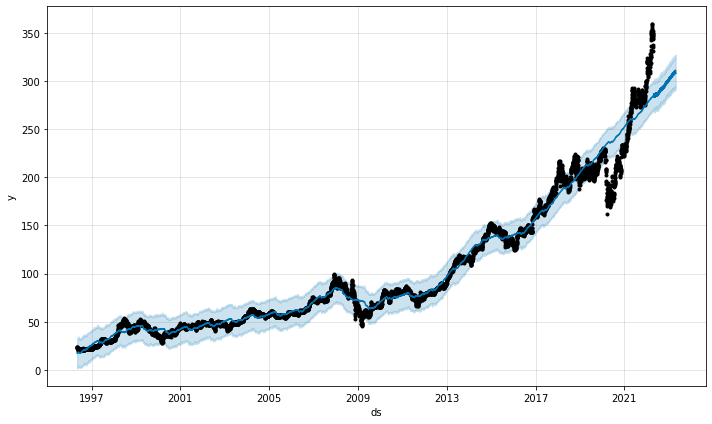

In [ ]:
m.plot(forecast);

## Make it a Function

In [ ]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,13.828667,12.670521,14.418370,13.828667,13.828667,-0.275626,-0.275626,-0.275626,-0.071054,-0.071054,-0.071054,-0.204572,-0.204572,-0.204572,0.0,0.0,0.0,13.553042
1,2017-05-08,13.820521,12.813882,14.490250,13.820521,13.820521,-0.179966,-0.179966,-0.179966,-0.069307,-0.069307,-0.069307,-0.110660,-0.110660,-0.110660,0.0,0.0,0.0,13.640554
2,2017-05-09,13.817805,12.875818,14.581204,13.817805,13.817805,-0.145725,-0.145725,-0.145725,-0.064839,-0.064839,-0.064839,-0.080886,-0.080886,-0.080886,0.0,0.0,0.0,13.672080
3,2017-05-10,13.815089,12.902925,14.595091,13.815089,13.815089,-0.114871,-0.114871,-0.114871,-0.062465,-0.062465,-0.062465,-0.052406,-0.052406,-0.052406,0.0,0.0,0.0,13.700218
4,2017-05-11,13.812374,12.821517,14.658657,13.812374,13.812374,-0.095696,-0.095696,-0.095696,-0.070232,-0.070232,-0.070232,-0.025464,-0.025464,-0.025464,0.0,0.0,0.0,13.716678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,2022-10-19,22.822404,21.636745,24.580852,21.755860,24.029167,0.202675,0.202675,0.202675,-0.062465,-0.062465,-0.062465,0.265139,0.265139,0.265139,0.0,0.0,0.0,23.025079
1429,2022-10-20,22.829545,21.607901,24.551686,21.751402,24.047660,0.186599,0.186599,0.186599,-0.070232,-0.070232,-0.070232,0.256831,0.256831,0.256831,0.0,0.0,0.0,23.016144
1430,2022-10-21,22.836685,21.613151,24.525199,21.746945,24.066027,0.176400,0.176400,0.176400,-0.071054,-0.071054,-0.071054,0.247454,0.247454,0.247454,0.0,0.0,0.0,23.013085
1431,2022-10-22,22.843826,21.819851,24.635620,21.742615,24.085690,0.406154,0.406154,0.406154,0.168948,0.168948,0.168948,0.237206,0.237206,0.237206,0.0,0.0,0.0,23.249979


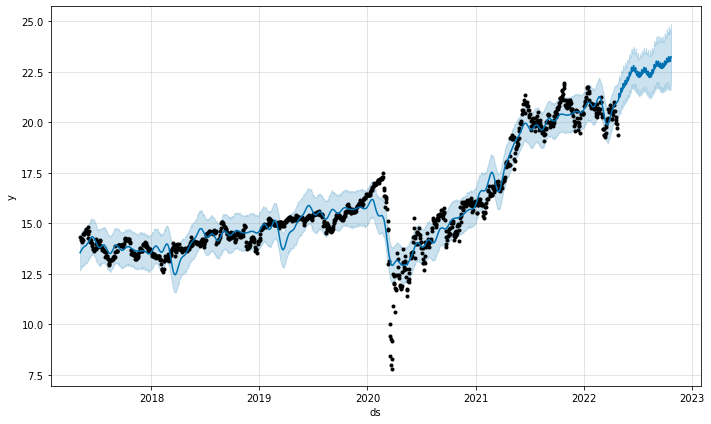

In [ ]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2624,2024-04-21,75.519266,42.560474,103.626573,47.180160,104.437120,-2.249483,-2.249483,-2.249483,-2.927530,-2.927530,-2.927530,0.678046,0.678046,0.678046,0.0,0.0,0.0,73.269783
2625,2024-04-22,75.560219,46.339092,107.916112,47.161745,104.554228,1.879896,1.879896,1.879896,1.083106,1.083106,1.083106,0.796790,0.796790,0.796790,0.0,0.0,0.0,77.440114
2626,2024-04-23,75.601171,48.703439,108.535092,47.153795,104.641713,2.091616,2.091616,2.091616,1.177292,1.177292,1.177292,0.914324,0.914324,0.914324,0.0,0.0,0.0,77.692787
2627,2024-04-24,75.642124,47.316157,108.904598,47.161212,104.726060,2.170041,2.170041,2.170041,1.141989,1.141989,1.141989,1.028052,1.028052,1.028052,0.0,0.0,0.0,77.812165
2628,2024-04-25,75.683076,47.432047,107.996833,47.168628,104.816627,2.366128,2.366128,2.366128,1.230837,1.230837,1.230837,1.135291,1.135291,1.135291,0.0,0.0,0.0,78.049204


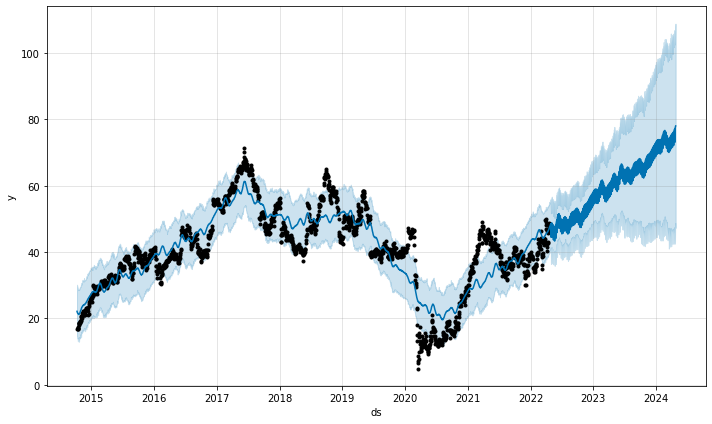

In [ ]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1298,2022-04-27,35.233363,29.290979,41.331496
1299,2022-04-28,35.097740,28.572356,41.136991
1300,2022-04-29,35.168164,29.419848,41.012028
1301,2022-04-30,33.678222,27.394447,39.857648
1302,2022-05-01,33.565688,27.212420,39.598464
...,...,...,...,...
1658,2023-04-22,3.617302,-19.914361,24.026579
1659,2023-04-23,3.543088,-20.852767,25.224017
1660,2023-04-24,4.627040,-19.667527,28.219743
1661,2023-04-25,4.613146,-19.248151,27.603796


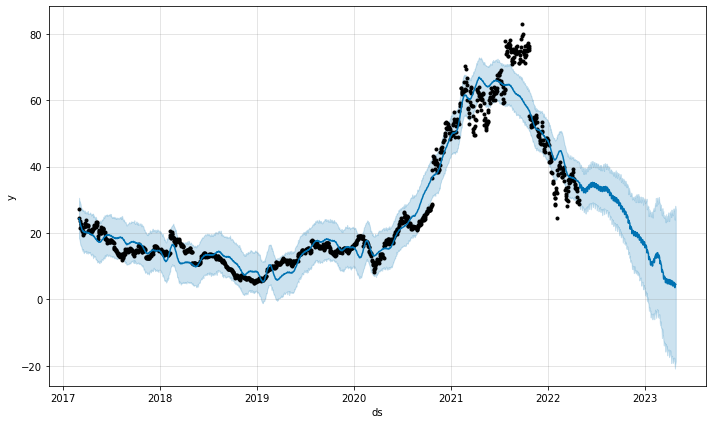

In [ ]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast